# Programación como Herramienta para la Ingeniería 2020-2
## Ayudantía 4: Herramientas avanzadas en python
### Ayudante: Pablo Seisdedos (pcseisdedos@uc.cl)

## Parte 2: Webscraping y RegEx 


Esta sección está basada en [esta página](https://towardsdatascience.com/web-scraping-regular-expressions-and-data-visualization-doing-it-all-in-python-37a1aade7924)

Links de interés:
- https://regex101.com/
- https://pypi.org/project/pyrematch/

Temas:
- Obtener información de internet utilizando webscraping
- Procesar la información obtenida usando RegEx
- Visualizar la información procesada utilizando pandas

In [1]:
import urllib.request as net
import ssl
from bs4 import BeautifulSoup
from unidecode import unidecode
import pyrematch as pyre
import re

In [2]:
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
link = 'http://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html'
headers = {'User-Agent':user_agent}
request= net.Request(link, None, headers)
gcontext = ssl.SSLContext()
response = net.urlopen(request,context=gcontext)
soup = BeautifulSoup(response.read().decode('utf-8'))

In [3]:
soup

<!DOCTYPE html>
<html lang="en"><head><script async="" src="https://polyfill.io/v3/polyfill.min.js"></script><link href="/pf/dist/components/combinations/default.css?d=414" id="fusion-template-styles" rel="stylesheet" type="text/css"/><link href="/pf/resources/dist/cleveland/css/style.css?d=414" rel="stylesheet"/><script type="application/javascript">if(!Array.prototype.includes||!(window.Object && window.Object.assign)||!window.Promise||!window.Symbol||!window.fetch){document.write('<script type="application/javascript" src="/pf/dist/engine/polyfill.js?d=414" defer=""><\/script>')}</script><script defer="" id="fusion-engine-script" src="/pf/dist/engine/react.js?d=414" type="application/javascript"></script><script defer="" id="fusion-engine-script" src="/pf/dist/components/combinations/default.js?d=414" type="application/javascript"></script><link href="/pf/resources/images/cleveland/favicon.ico?d=414" rel="icon" type="image/x-icon"/><link href="/pf/resources/manifest/cleveland/manife

In [4]:
# Extrae la division que necesitamos
main_content = soup.find('div', attrs = {'class': 'entry-content'})
main_content

<div class="entry-content"><p class="article__paragraph article__paragraph--left" id="UDT3SSNMTRCTFDQE6DBFNJODLI">CLEVELAND, Ohio - <a href="http://www.case.edu/">Case Western Reserve University </a>President Barbara Snyder's $700,312 base pay and $175,000 bonus in 2015 again made her the highest paid private college leader in Ohio, according to an annual report.</p><p class="article__paragraph article__paragraph--left" id="AOJSWF2SO5F6NLAFYE77J7FAPI">Nationally, Snyder's total compensation of $1.154 million, which can include deferred compensation and other pay, ranked 41st out of 541 presidents of private colleges according to the report by the <a href="http://chronicle.com/">Chronicle of Higher Education.</a></p><div class="InContent_Center_Background"><div class="InContent_Center_Padding"><div class="ad ad--in-article" id="InContent_Center_AOJSWF2SO5F6NLAFYE77J7FAPI"></div></div></div><p class="article__paragraph article__paragraph--left" id="F67RF4SFXRGCPECJF3ZBO2YYL4">She is amon

In [5]:
# Extrae las listas no ordenadas (ul)
content = main_content.find('ul').text
content

'Grant Cornwell, College of Wooster (left in 2015): $911,651Marvin Krislov, Oberlin College (left in 2016): \xa0$829,913Mark Roosevelt, Antioch College, (left in 2015): $507,672Laurie Joyner, Wittenberg University (left in 2015): $463,504Richard Giese, University of Mount Union (left in 2015): $453,800Sean Decatur,Kenyon College: $451,698Adam Weinberg, Denison University: $435,322Daniel Dibiasio, Ohio Northern University: $414,716Denvy Bowman, Capital University (left in 2016): $388,570Anne Steele, Muskingum University (left in 2016): $384,233Kathy Krendl, Otterbein University: \xa0$378,035Rockwell Jones, Ohio Wesleyan University: $366,625Robert Helmer, Baldwin Wallace University: $365,616Robert Huntington, Heidelberg University: $300,005Lori Varlotta, Hiram College: $293,336Joseph Bruno, Marietta College (left in 2016): $288,295W. Richard Merriman Jr., University of Mount Union (started in June 2015): $221,761'

- (^|[0-9])[A-Z][a-zA-Z \.]+ [A-Z][a-zA-Z \.]+($|,)
- (?:, )[A-Z][a-zA-Z ]+(?:| \(|,|:)
- (?:\$)[0-9,]+ o [0-9]{3},[0-9]{3}

In [6]:
document = unidecode(content)
pattern = "(^|[0-9])!text{[A-Z][a-zA-Z \.]+ [A-Z][a-zA-Z \.]+}($|,)"
regex = pyre.compile(pattern)
names = [match.group('text') for match in regex.finditer(document)]

In [7]:
names

['Grant Cornwell',
 'Marvin Krislov',
 'Mark Roosevelt',
 'Laurie Joyner',
 'Richard Giese',
 'Sean Decatur',
 'Adam Weinberg',
 'Daniel Dibiasio',
 'Denvy Bowman',
 'Anne Steele',
 'Kathy Krendl',
 'Rockwell Jones',
 'Robert Helmer',
 'Robert Huntington',
 'Lori Varlotta',
 'Joseph Bruno',
 'W. Richard Merriman Jr.']

In [8]:
document = unidecode(content)
pattern = "(, |,)!text{[A-Z][a-zA-Z ]+}(\(|,|:)"#"(,|,\s)!text{([A-Z]{1}.*?)}(\s\(|:|,)}"#"(, |,)!text{[A-Z][a-zA-Z ]+}(\(|,|:)"
regex = pyre.compile(pattern)
matches = [match.group('text').strip() for match in regex.findall(document)]

In [9]:
matches

['University of Mount Union',
 'Marietta College',
 'Muskingum University',
 'Capital University',
 'University of Mount Union',
 'Wittenberg University',
 'Oberlin College',
 'College of Wooster',
 'Antioch College',
 'Hiram College',
 'Heidelberg University',
 'Baldwin Wallace University',
 'Ohio Wesleyan University',
 'Otterbein University',
 'Ohio Northern University',
 'Denison University',
 'Kenyon College']

In [10]:
no_repetidos = [(document.index(match),match) for match in matches if document.count(match) == 1]
repetidos = list(map(lambda match:[(m.start(), match) for m in re.finditer(match, document)],set([name for name in matches if document.count(name) !=1])))[0]
schools = [name for index, name in sorted(repetidos + no_repetidos)]
schools

['College of Wooster',
 'Oberlin College',
 'Antioch College',
 'Wittenberg University',
 'University of Mount Union',
 'Kenyon College',
 'Denison University',
 'Ohio Northern University',
 'Capital University',
 'Muskingum University',
 'Otterbein University',
 'Ohio Wesleyan University',
 'Baldwin Wallace University',
 'Heidelberg University',
 'Hiram College',
 'Marietta College',
 'University of Mount Union']

In [11]:
(lambda x: x + 1)(2)

3

In [12]:
list(map(lambda match: (document.index(match),match) if document.count(match) == 1 else 0,matches))


[0,
 (793, 'Marietta College'),
 (500, 'Muskingum University'),
 (444, 'Capital University'),
 0,
 (188, 'Wittenberg University'),
 (75, 'Oberlin College'),
 (16, 'College of Wooster'),
 (132, 'Antioch College'),
 (756, 'Hiram College'),
 (710, 'Heidelberg University'),
 (655, 'Baldwin Wallace University'),
 (606, 'Ohio Wesleyan University'),
 (559, 'Otterbein University'),
 (396, 'Ohio Northern University'),
 (351, 'Denison University'),
 (312, 'Kenyon College')]

In [13]:
#school_pattern = re.compile(r'(?:,|,\s)([A-Z]{1}.*?)(?:\s\(|:|,)')
#school_pattern.findall(unidecode(content))

In [14]:
document = unidecode(content)
pattern = "!text{[0-9]{3},[0-9]{3}}"
regex = pyre.compile(pattern)
salaries = [match.group('text') for match in regex.finditer(document)]
salaries

['221,761',
 '288,295',
 '293,336',
 '300,005',
 '365,616',
 '366,625',
 '378,035',
 '384,233',
 '388,570',
 '414,716',
 '435,322',
 '451,698',
 '453,800',
 '463,504',
 '507,672',
 '829,913',
 '911,651']

In [15]:
salaries = [int(salario.replace(",","")) for salario in salaries]
salaries

[221761,
 288295,
 293336,
 300005,
 365616,
 366625,
 378035,
 384233,
 388570,
 414716,
 435322,
 451698,
 453800,
 463504,
 507672,
 829913,
 911651]

In [16]:
len(names), len(schools), len(salaries)

(17, 17, 17)

# Visualización 

In [17]:
import pandas as pd

# Cargar la info en un df
df = pd.DataFrame({'salary': salaries, 
                   'President': names,
                   'College': schools})

# Agrega una nueva vila en la posicion 17 (la ultima)
df.loc[17, :] = [1154000,'Barbara Synder','CWRU']

# Ordena por salario de forma decreciente
df = df.sort_values('salary', ascending=False).reset_index().drop(columns='index')

In [18]:
df

,salary,President,College
0,1154000.0,Barbara Synder,CWRU
1,911651.0,W. Richard Merriman Jr.,University of Mount Union
2,829913.0,Joseph Bruno,Marietta College
3,507672.0,Lori Varlotta,Hiram College
4,463504.0,Robert Huntington,Heidelberg University
5,453800.0,Robert Helmer,Baldwin Wallace University
6,451698.0,Rockwell Jones,Ohio Wesleyan University
7,435322.0,Kathy Krendl,Otterbein University
8,414716.0,Anne Steele,Muskingum University
9,388570.0,Denvy Bowman,Capital University


## Visualización rápida

<AxesSubplot:ylabel='President'>

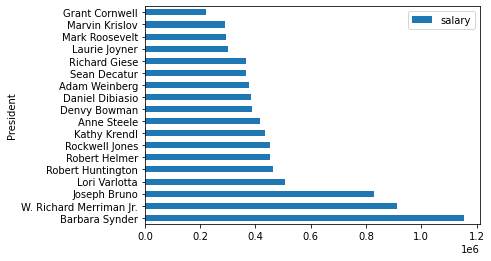

In [19]:
df.plot(kind='barh', x = 'President', y = 'salary')

## Mejorando el gráfico


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# Selecciona el estilo
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 16

import seaborn as sns

# Ordena por salario de forma decreciente
df = df.sort_values('salary', ascending=False).reset_index()

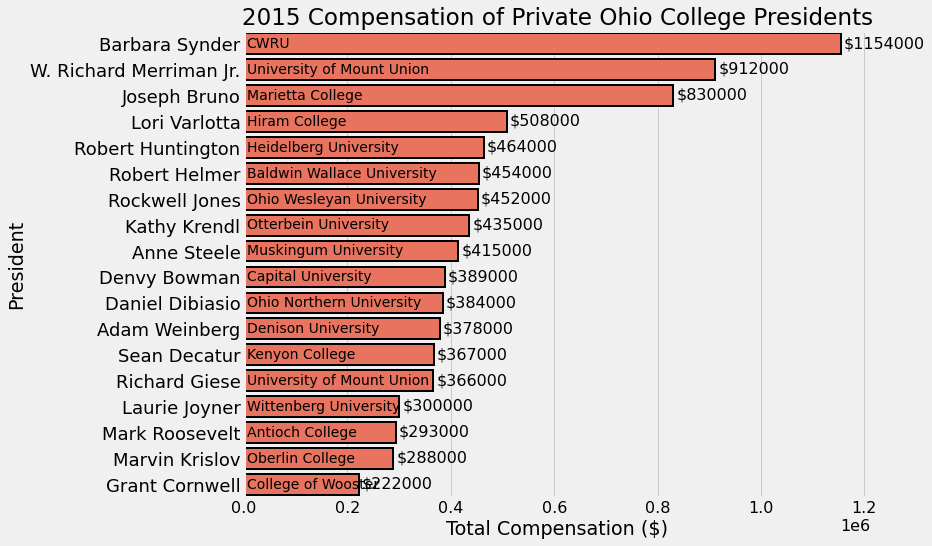

In [21]:
plt.figure(figsize=(10, 8))
sns.barplot(x = 'salary', y = 'President', data = df, 
            color = 'tomato', edgecolor = 'k', linewidth = 2)

# Agrega el texto mostrando los valores y universidades
for i, row in df.iterrows():
    plt.text(x = row['salary'] + 6000, y = i + 0.15, s = '$%d' % (round(row['salary'] / 1000) * 1000))
    plt.text(x = 5000, y = i + 0.15, s = row['College'], size = 14)

# Agrega las labels
plt.xticks(size = 16); plt.yticks(size = 18)
plt.xlabel('Total Compensation ($)')
plt.ylabel('President') 
plt.title('2015 Compensation of Private Ohio College Presidents');

In [25]:
# Calcula el valor de 5 minutos del tiempo de cada presidente (universidad)
five_minutes_fraction = 5 / (2000 * 60)
total_df = pd.DataFrame(df.groupby('College')['salary'].sum())
total_df['five_minutes_cost'] = round(total_df['salary'] * five_minutes_fraction)
total_df = total_df.sort_values('five_minutes_cost', ascending = False).reset_index()

total_df

,College,salary,five_minutes_cost
0,University of Mount Union,1277267.0,53.0
1,CWRU,1154000.0,48.0
2,Marietta College,829913.0,35.0
3,Hiram College,507672.0,21.0
4,Ohio Wesleyan University,451698.0,19.0
5,Heidelberg University,463504.0,19.0
6,Baldwin Wallace University,453800.0,19.0
7,Otterbein University,435322.0,18.0
8,Muskingum University,414716.0,17.0
9,Capital University,388570.0,16.0


## Visualización final


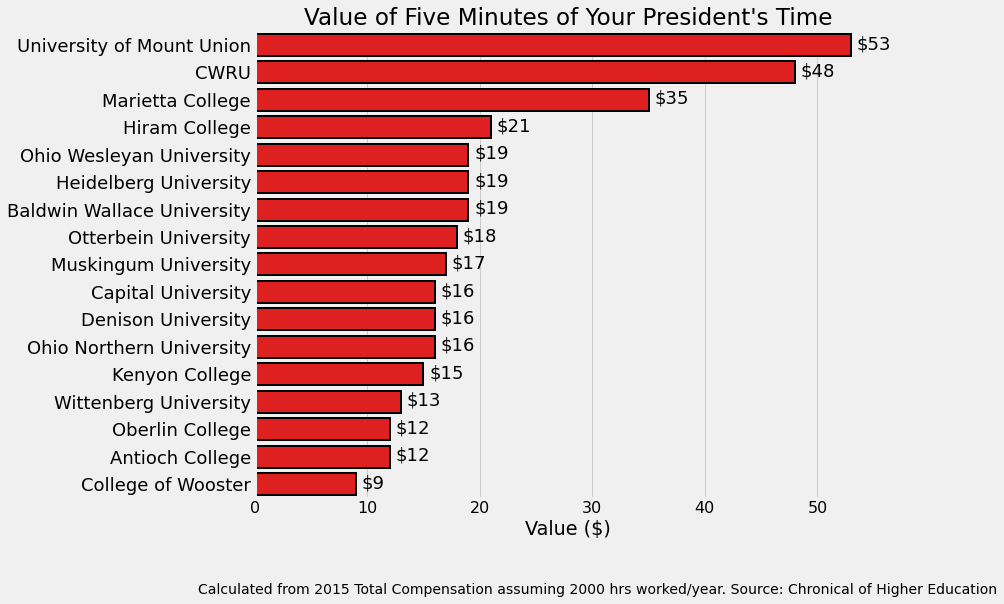

In [23]:
# Caption
txt = 'Calculated from 2015 Total Compensation assuming 2000 hrs worked/year. Source: Chronical of Higher Education'

# barplot
plt.figure(figsize=(10, 8))
sns.barplot(x = 'five_minutes_cost', y = 'College', data = total_df, 
            color = 'red', edgecolor = 'k', linewidth = 2)

# Agrega el texto y valores
for i, row in total_df.iterrows():
    plt.text(x = row['five_minutes_cost'] + 0.5, y = i + 0.15, s = '$%d' % (row['five_minutes_cost']), size = 18)

# caption
plt.text(x = -5, y = 20, s = txt, size = 14)

# labels
plt.xticks(size = 16); plt.yticks(size = 18)
plt.xlabel('Value ($)')
plt.ylabel('') 
plt.title("Value of Five Minutes of Your President's Time");